In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline as interp
from sklearn.linear_model import LinearRegression

data = pd.read_csv("Data/Growth_Curves.csv").iloc[0:41]
dfod = data.sort_values(by="Time")
dfodcutmax= dfod.iloc[0:16]


odvalues = np.array(dfodcutmax["OD"].tolist())
timevalues = np.array(dfodcutmax["Time"].tolist())
print(timevalues)

odvaluesmax = odvalues.max().argmax()



print(dfod["OD"].max())

dfodcutmax


[ 0.80691054  1.9778964   3.15166264  4.32905657  5.51218795  6.68927405
  7.86096513  9.03391511 10.21156321 11.39955138 12.588198   13.76084598
 14.93155806 16.11203878 17.28863548 18.47008381]
0.5279


,Unnamed: 0,Master,Sub.plate,Treatment,Strain,OD,Read,Time
10,11,2,1,Basal,ECOR31,0.0451,1,0.806911
5,6,2,1,Basal,ECOR31,0.0590,2,1.977896
29,30,2,1,Basal,ECOR31,0.1174,3,3.151663
9,10,2,1,Basal,ECOR31,0.2037,4,4.329057
36,37,2,1,Basal,ECOR31,0.2342,5,5.512188
35,36,2,1,Basal,ECOR31,0.2725,6,6.689274
12,13,2,1,Basal,ECOR31,0.3135,7,7.860965
24,25,2,1,Basal,ECOR31,0.3591,8,9.033915
19,20,2,1,Basal,ECOR31,0.4021,9,10.211563
22,23,2,1,Basal,ECOR31,0.4476,10,11.399551


In [166]:
### Smooth curve

smoothsteps = 500
timesmooth = np.linspace(timevalues.min(),timevalues.max(), smoothsteps)
spl = interp(timevalues,odvalues, k = 3)
odsmooth = spl(timesmooth)


In [181]:
### Linear regression

liregmodel = LinearRegression()

liregmodel.fit(timevalues.reshape(-1,1),odvalues)

odprediction = liregmodel.predict(timevalues.reshape(-1,1))
R2_od = liregmodel.score(timevalues.reshape(-1,1),odvalues)
print(f"The R² values is: {R2_od:.4f}")

slope = liregmodel.coef_[0]
slopeod = liregmodel.intercept_
print(f"{slopeod:.4f}")




The R² values is: 0.9433
0.0581


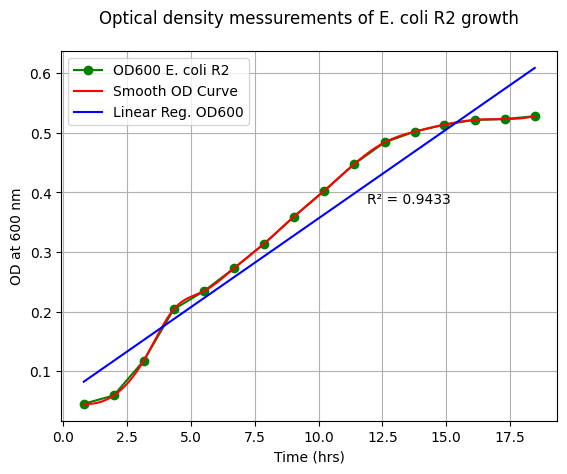

In [173]:

fig, ax = plt.subplots()
plt.plot(timevalues,odvalues, "g-o",label="OD600 E. coli R2")
plt.plot(timesmooth,odsmooth,"r",label="Smooth OD Curve")
plt.plot(timevalues,odprediction,"b",label="Linear Reg. OD600")
plt.text(0.7,0.6,f"R² = {R2_od:.4f}", ha = "center", va = "center", transform = plt.gca().transAxes)

plt.grid()
plt.legend()
plt.xlabel("Time (hrs)")
plt.ylabel("OD at 600 nm")
plt.title("Optical density messurements of E. coli R2 growth",pad=20)
plt.show()